In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy
import math
import pandas as pd

In [2]:
import scipy.io

keys = ['names', 'images', 'drawings', 'offsets']

def load_mat(file):
	mat = scipy.io.loadmat(file)
	return mat

mat_dict = load_mat("./data_background.mat")

names = []
for i in range(len(mat_dict['names'])):
	names.append(str(mat_dict['names'][i].tolist()[0][0]))

character = {}
for index, (name, drawings_dir, images_dir) in enumerate(zip(names, mat_dict['drawings'], mat_dict['images'])):

	drawings_dir, images_dir = drawings_dir[0], images_dir[0]

	_dir = []
	for drawings_subdir, images_subdir in zip(drawings_dir, images_dir):
		drawings_subdir, images_subdir = drawings_subdir[0], images_subdir[0]
		_subdir = []
		for drawings_img, images_img in zip(drawings_subdir, images_subdir):
			idrawings_img, images_img = drawings_img[0], images_img[0]

			_img = {}
			_img['data'] = images_img
			_img['strokes'] = []
			for drawings_stroke in zip(drawings_img):
				_img['strokes'].append(drawings_stroke[0])
			_subdir.append(_img)
		_dir.append(_subdir)

	character[name] = _dir

In [3]:
print(len(character['Braille'][8][1]['strokes'][0][8][0]))

25


In [4]:
# primitives = character[<language>][<character>][<character number>]['strokes'][0][<primitive number>][0] --> (n,2) numpy array

In [5]:
character['Hebrew'][8][1]['strokes'][0][1][0].shape

(58, 2)

In [67]:
x=character['Hebrew'][8][1]['strokes'][0][1][0][:,[0]]
y=character['Hebrew'][8][1]['strokes'][0][1][0][:,[1]]

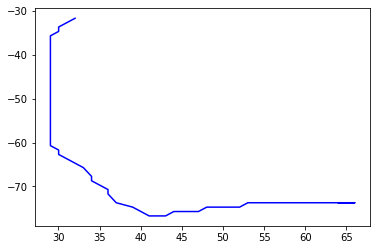

In [68]:
plt.plot(x,y,'b')
plt.show()

In [69]:
from rdp import rdp

In [70]:
mask = rdp(character['Hebrew'][8][1]['strokes'][0][1][0],epsilon=1,algo="iter",return_mask=False)

In [71]:
mask.shape[0]

7

In [72]:
character['Hebrew'][8][1]['strokes'][0][1][0].shape

(58, 2)

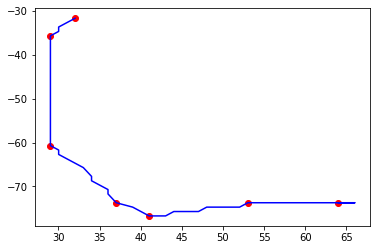

In [73]:
plt.plot(mask[:,[0]],mask[:,[1]],'ro')
plt.plot(x,y,'b')
plt.show()

In [74]:
# rdp takes a (n,2) input, so I make a function and 
# iterate it until it gives me a 5 point representation of the spline.

In [75]:
def spline(prim):
    """
    Args:
        prim (numpy array): Numpy array of points in dimension (n,2), in the format (x,y).
        
    Return:
        Numpy array (spline) of dimension (5,2).
    """
    mask = rdp(prim,algo="iter",return_mask=False)
    ep=0
    while mask.shape[0]!=5 :
        ep+=0.1
        mask=rdp(prim,epsilon=ep,algo="iter",return_mask=False)
    return mask

In [76]:
sp=spline(character['Hebrew'][8][1]['strokes'][0][1][0])

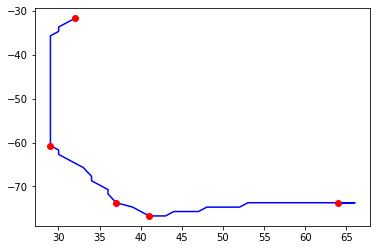

In [77]:
plt.plot(x,y,'b')
plt.plot(sp[:,[0]],sp[:,[1]],'ro')

In [78]:
from scipy import interpolate

In [79]:
print(x.reshape(-1).shape,y.reshape(-1).shape)

(58,) (58,)


In [80]:
tck, u = interpolate.splprep((x.reshape(-1),y.reshape(-1)), s=0)
unew = numpy.arange(25,70,1)
out = interpolate.splev(unew, tck)
print(unew)

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


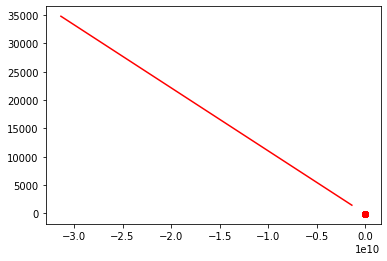

In [82]:
plt.plot(out[0],out[1],'r')
plt.plot(x,y,'ro')
plt.show()

In [83]:
tck1, u = interpolate.splprep((sp[:,[0]].reshape(-1),sp[:,[1]].reshape(-1)), s=0)
unew1 = numpy.arange(25,70,1)
out1 = interpolate.splev(unew1, tck1)

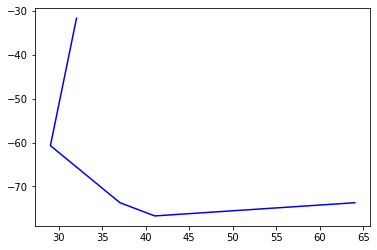

In [84]:
# plt.plot(out1[0],out1[1],'r')
plt.plot(sp[:,[0]],sp[:,[1]],'b')
plt.show()

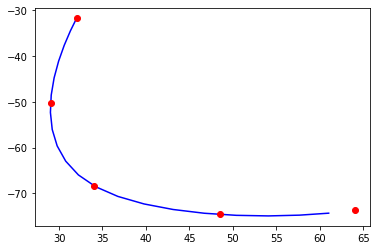

In [92]:
# Method 1
tck, u = interpolate.splprep([x.reshape(-1), y.reshape(-1)], s=0) #
unew = numpy.arange(0,1.1,0.25) #
out = interpolate.splev(unew, tck)#
xn, yn = out[0], out[1] #
tck, u = interpolate.splprep([xn, yn], s=0)
unew2 = numpy.arange(0,1,0.05)
out2 = interpolate.splev(unew2, tck)
plt.plot(out2[0],out2[1],'b')
plt.plot(xn,yn,'ro')
plt.show()

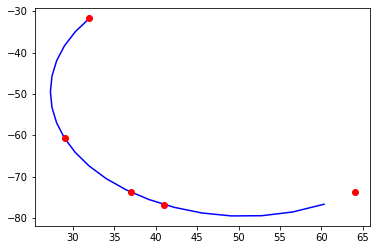

In [94]:
# Method 2
xn, yn = sp[:, 0], sp[:, 1]
tck, u = interpolate.splprep([xn, yn], s=0)
unew2 = numpy.arange(0,1,0.05)
out2 = interpolate.splev(unew2, tck)
plt.plot(out2[0],out2[1],'b')
plt.plot(xn,yn,'ro')
plt.show()

In [95]:
# I will use method 1, as recommended by Shashi.
# Storing the primitives as 5-point splines for each and every character in the dataset.
# primitives = character[<language>][<character>][<character number>]['strokes'][0][<primitive number>][0] --> (n,2) numpy array

